In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 2. Data and Sampling Distributions

The proliferation of data of varying quality and relevance reinforces the needs for sampling as a tool to work efficiently with a variety of data and to minimize bias. Even in a big data project, predictive models are typically developed and piloted with samples.

#### Random sampling and sample bias

Random sampling is a process in which each available member of the population being sampled has an equal change of being chosen for the sample at each draw. Data quality often matter more than data quantity when making an estimate or a model based on a sample.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Sample</td>
        <td>A subset from a larger data set.</td>
    </tr>
    <tr>
        <td>Population</td>
        <td>The larger data set or idea of a data set.</td>
    </tr>
    <tr>
        <td>N (n)</td>
        <td>The size of the population (sample).</td>
    </tr>
    <tr>
        <td>Random sampling</td>
        <td>Drawing elements into a sample at random.</td>
    </tr>
    <tr>
        <td>Stratified sampling</td>
        <td>Dividing the population into strata and randomly sampling from each strata.</td>
    </tr>
    <tr>
        <td>Stratum (pl., strata)</td>
        <td>A homogeneous subgroup of a population with common characteristics.</td>
    </tr>
    <tr>
        <td>Simple random sample</td>
        <td>The sample that results from random sampling withou stratifying the population.</td>
    </tr>
    <tr>
        <td>Bias</td>
        <td>Systematic error.</td>
    </tr>
    <tr>
        <td>Sample bias</td>
        <td>A sample that misrepresents the population.</td>
    </tr>
</table>

#### Bias

Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process. An important distinction should be made between errors due to random chance and errors due to bias. An unbiased process will produce error, but it is random and does not tend strongly in any direction.

#### Selection bias

Selection bias refers to the practice of selectively choosing data - consciouly or unconsciously - in a way that leads to a conclusion that is misleading or ephemeral.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Selection bias</td>
        <td>Bias resulting from the way in which observations are selected.</td>
    </tr>
    <tr>
        <td>Data snooping</td>
        <td>Extensive hunting through data in search of something interesting.</td>
    </tr>
    <tr>
        <td>Vast search effect</td>
        <td>Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.</td>
    </tr>
    
</table>

#### Regression to the mean

Regression to the mean, meaning to "go back", is distinct from the statistical modeling method of linear regression, in which a linear relationship is estimated between predictor variables and an outcome variable.

#### Sampling distribution of a statistic

The term _sampling distribution_ of a statistic refers to the distribution of some sample statistic  over many samples drawn from the same population. Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Sample statistic</td>
        <td>A metric calculated for a sample of data drawn from a larger population.</td>
    </tr>
    <tr>
        <td>Data distribution</td>
        <td>The frequency distribution of individual <i>values</i> in a dataset.</td>
    </tr>
    <tr>
        <td>Sampling distribution</td>
        <td>The frequency distribution of a <i>sample statistic</i> over many samples or resamples.</td>
    </tr>
    <tr> 
        <td>Central limit theorem</td>
        <td>The tendency of sampling distribution to take on a normal shape as sample size rises.</td>
    </tr>
    <tr> 
        <td>Standard error</td>
        <td>The variability (standard deviation) of a sample <i>statistic</i> over many samples (not to be confused with <i>standard deviation</i>, which by itself, refers to variability of individuals data <i>values</i></td>
    </tr>
</table>

In [ ]:
# Load loan_income
df_loan_income = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/loans_income.csv')
df_loan_income.tail()

,x
49995,40000
49996,54000
49997,50000
49998,82000
49999,70000


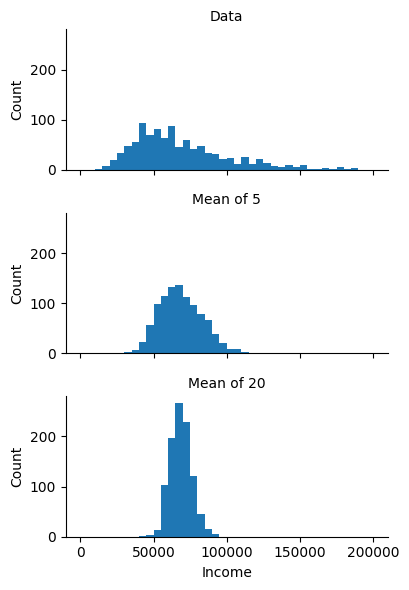

In [5]:
import seaborn as sns

sample_data = pd.DataFrame({
	'income': df_loan_income['x'].sample(1000),
	'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
	'income': [df_loan_income['x'].sample(5).mean() for _ in range(1000)],
	'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
	'income': [df_loan_income['x'].sample(20).mean() for _ in range(1000)],
	'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')